### **0. Set-up**

In [1]:
# Import libraries and utils
%run '../../../utils.ipynb'

In [2]:
# Load NL predicted
raw_nl_pred = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f6.csv")

In [3]:
# Load EN predicted
raw_en_pred = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f6.csv")

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [4]:
# Select first 25 word pairs
raw_nl_pred = raw_nl_pred.head(25)
raw_en_pred = raw_en_pred.head(25)

In [5]:
# Show results
raw_nl_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,oud,nieuw,0.10,0.06,0.0,0.0,0.13,0.45,0.1,0.08,0.10,0.05,0.02,0.04,0.32,0.13,0.06
1,slim,intelligent,0.95,0.05,8.0,8.0,0.72,0.90,0.9,0.95,0.95,0.90,0.95,0.79,0.93,0.70,1.00
2,hard,moeilijk,0.10,0.03,2.0,2.0,0.12,0.20,0.2,0.10,0.10,0.10,0.15,0.26,0.27,0.04,0.09
3,gelukkig,vrolijk,0.80,0.05,6.0,6.0,0.67,0.65,0.8,0.70,0.75,0.80,0.70,0.62,0.75,0.49,0.65
4,hard,stoer,0.40,0.07,2.0,4.0,0.26,0.30,0.2,0.20,0.45,0.20,0.45,0.51,0.49,0.42,0.58
5,snel,razendsnel,0.90,0.09,9.0,8.0,0.86,0.85,0.9,0.90,0.90,0.95,0.90,0.91,0.89,0.92,0.80
6,gelukkig,blij,0.70,0.07,7.0,7.0,0.70,0.75,0.8,0.75,0.80,0.70,0.80,0.72,0.68,0.61,0.77
7,kort,lang,0.10,0.03,2.0,1.0,0.26,0.10,0.1,0.05,0.10,0.05,0.05,0.13,0.14,0.04,0.14
8,dom,stom,0.80,0.09,7.0,6.0,0.59,0.70,0.7,0.80,0.80,0.80,0.60,0.61,0.78,0.54,0.76
9,vreemd,eigenaardig,0.90,0.09,9.0,9.0,0.81,0.90,0.9,0.90,0.85,0.90,0.95,0.83,0.89,0.78,1.00


In [6]:
# Show results
raw_en_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,old,new,0.0,0.19,1.00,0.07,0.02,0.04,0.01,2.5,0.01,1.0,0.01,0.15,0.04,0.01,0.04
1,smart,intelligent,10.0,0.83,1.00,0.88,0.94,0.95,9.50,7.5,8.00,1.0,9.50,0.95,1.00,9.00,0.91
2,hard,difficult,8.0,0.40,0.84,0.75,0.51,0.92,8.00,4.5,6.50,0.0,4.00,0.86,0.23,8.50,0.75
3,happy,cheerful,8.0,0.84,0.91,0.82,0.52,0.43,7.50,8.0,6.00,0.0,7.50,0.86,0.75,8.50,0.64
4,hard,easy,0.0,0.23,0.11,0.05,0.31,0.09,2.00,1.5,1.00,0.0,2.00,0.27,0.04,0.01,0.13
5,fast,rapid,9.0,0.85,1.00,0.87,0.81,0.89,8.50,8.5,8.50,1.0,8.50,0.84,0.95,9.50,0.92
6,happy,glad,7.0,0.75,0.75,0.78,0.74,0.75,7.00,7.5,7.00,0.0,8.00,0.86,0.83,8.00,0.73
7,short,long,8.0,0.33,0.73,0.83,0.71,0.87,8.00,6.5,5.00,1.0,5.50,0.85,0.22,7.50,0.62
8,stupid,dumb,9.0,0.94,1.00,0.91,0.92,0.94,9.00,8.0,8.00,1.0,9.00,0.94,0.93,8.00,0.88
9,weird,strange,9.0,0.89,1.00,0.84,0.96,0.94,9.00,9.0,9.00,1.0,8.00,0.93,0.86,9.00,0.92


### **1. Data Processing**

In [7]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
nl_pred['nl_pred_sl'] = nl_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
nl_pred['nl_pred_sd'] = nl_pred[similarity_cols].std(axis=1).round(2)

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl', 'nl_pred_sd']]

# Show results
nl_pred

,word1,word2,nl_pred_sl,nl_pred_sd
0,oud,nieuw,0.11,0.12
1,slim,intelligent,1.78,2.54
2,hard,moeilijk,0.38,0.66
3,gelukkig,vrolijk,1.36,1.89
4,hard,stoer,0.70,1.02
5,snel,razendsnel,1.85,2.71
6,gelukkig,blij,1.52,2.23
7,kort,lang,0.29,0.53
8,dom,stom,1.44,2.07
9,vreemd,eigenaardig,1.91,2.88


In [8]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
en_pred['en_pred_sl'] = en_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
en_pred['en_pred_sd'] = en_pred[similarity_cols].std(axis=1).round(2)

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl', 'en_pred_sd']]

# Show results
en_pred

,word1,word2,en_pred_sl,en_pred_sd
0,old,new,0.34,0.69
1,smart,intelligent,4.13,4.09
2,hard,difficult,2.98,3.26
3,happy,cheerful,3.42,3.56
4,hard,easy,0.52,0.73
5,fast,rapid,4.04,3.99
6,happy,glad,3.38,3.43
7,short,long,3.11,3.18
8,stupid,dumb,3.96,3.85
9,weird,strange,4.09,4.02


In [9]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,nl_pred_sd,word1,word2,en_pred_sl,en_pred_sd
0,oud,nieuw,0.11,0.12,old,new,0.34,0.69
1,slim,intelligent,1.78,2.54,smart,intelligent,4.13,4.09
2,hard,moeilijk,0.38,0.66,hard,difficult,2.98,3.26
3,gelukkig,vrolijk,1.36,1.89,happy,cheerful,3.42,3.56
4,hard,stoer,0.70,1.02,hard,easy,0.52,0.73
5,snel,razendsnel,1.85,2.71,fast,rapid,4.04,3.99
6,gelukkig,blij,1.52,2.23,happy,glad,3.38,3.43
7,kort,lang,0.29,0.53,short,long,3.11,3.18
8,dom,stom,1.44,2.07,stupid,dumb,3.96,3.85
9,vreemd,eigenaardig,1.91,2.88,weird,strange,4.09,4.02


### **2. Descriptive Statistics**

In [10]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Summary statistics standard deviations
nl_pred_sd_summary = round(nl_pred['nl_pred_sd'].describe(), 2)
en_pred_sd_summary = round(en_pred['en_pred_sd'].describe(), 2)

# Add median standard deviation
nl_pred_sd_summary['median'] = round(nl_pred['nl_pred_sd'].median(), 2)
en_pred_sd_summary['median'] = round(en_pred['en_pred_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary,
    "nl_pred_sd": nl_pred_sd_summary,
    "en_pred_sd": en_pred_sd_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,1.12,3.05,1.65,3.17
std,0.61,1.15,0.90,0.99
min,0.11,0.34,0.12,0.69
25%,0.58,2.63,0.83,2.93
50%,1.36,3.42,1.88,3.43
75%,1.58,3.97,2.39,3.90
max,1.92,4.13,2.88,4.09
median,1.36,3.42,1.88,3.43


#### **2.1. SimLex-999**

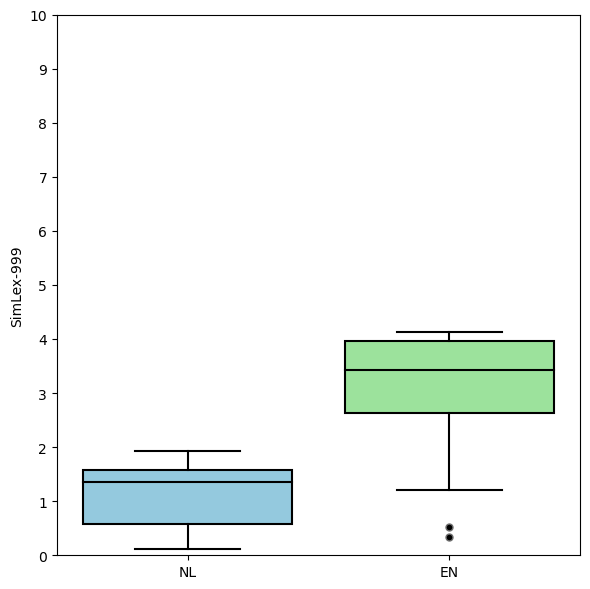

In [11]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **2.2. Standard Deviation**

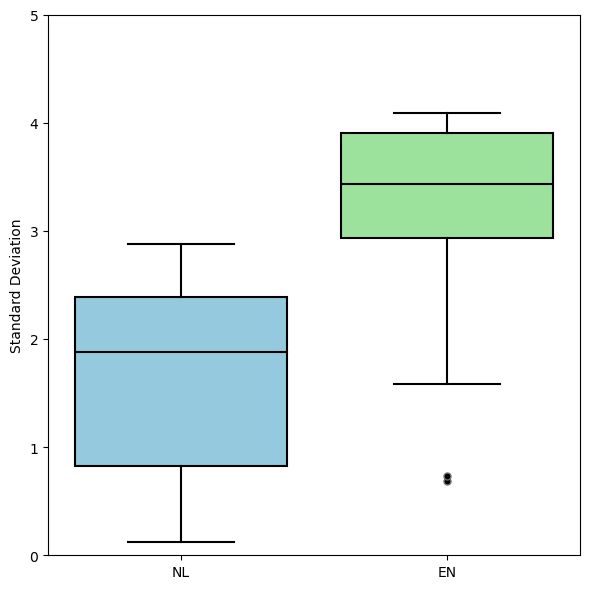

In [12]:
# Rename columns and copy
renamed_nl_pred_sd = nl_pred.rename(columns={"nl_pred_sd": "Standard Deviation"}).copy()
renamed_en_pred_sd = en_pred.rename(columns={"en_pred_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_nl_pred_sd['Score'] = 'NL'
renamed_en_pred_sd['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sd, renamed_en_pred_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

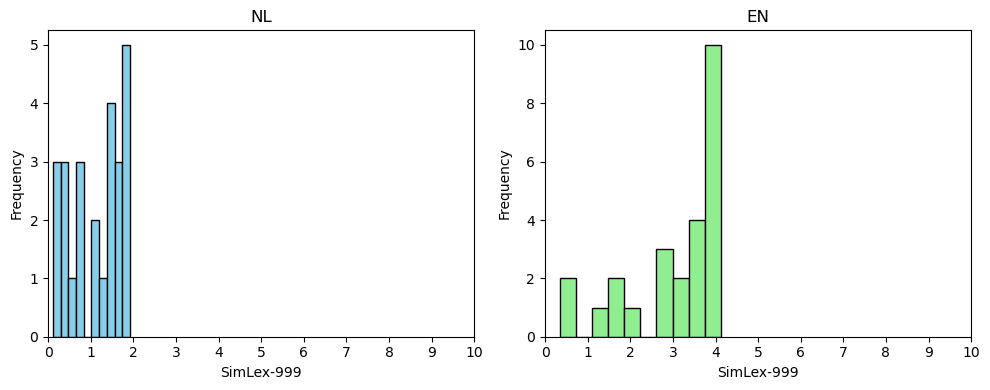

In [13]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

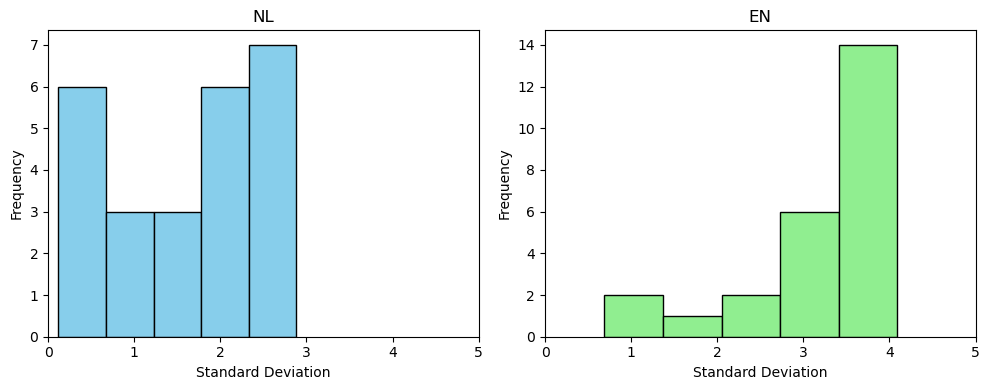

In [14]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [15]:
# Count outliers
print_outlier_counts(nl_pred)

No outliers found in columns: nl_pred_sl, nl_pred_sd


In [16]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sd')

No outliers found in nl_pred_sd


#### **4.2. EN**

In [17]:
# Count outliers
print_outlier_counts(en_pred)

Outliers in en_pred_sl: 2
Outliers in en_pred_sd: 2


In [18]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sd')


Outliers in en_pred_sd:
  word1 word2  en_pred_sl  en_pred_sd
0   old   new        0.34        0.69
4  hard  easy        0.52        0.73


#### **4.3. Add to Summary**

In [19]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_nl_pred_sd = calculate_outliers(nl_pred, 'nl_pred_sd')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')
outliers_en_pred_sd = calculate_outliers(en_pred, 'en_pred_sd')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_nl_pred_sd = outliers_nl_pred_sd.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]
count_outliers_en_pred_sd = outliers_en_pred_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl, count_outliers_nl_pred_sd, count_outliers_en_pred_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,1.12,3.05,1.65,3.17
std,0.61,1.15,0.90,0.99
min,0.11,0.34,0.12,0.69
25%,0.58,2.63,0.83,2.93
50%,1.36,3.42,1.88,3.43
75%,1.58,3.97,2.39,3.90
max,1.92,4.13,2.88,4.09
median,1.36,3.42,1.88,3.43
outliers,0.00,2.00,0.00,2.00


### **5. Correlation**

#### **5.1. SimLex-999 vs Standard Deviation**

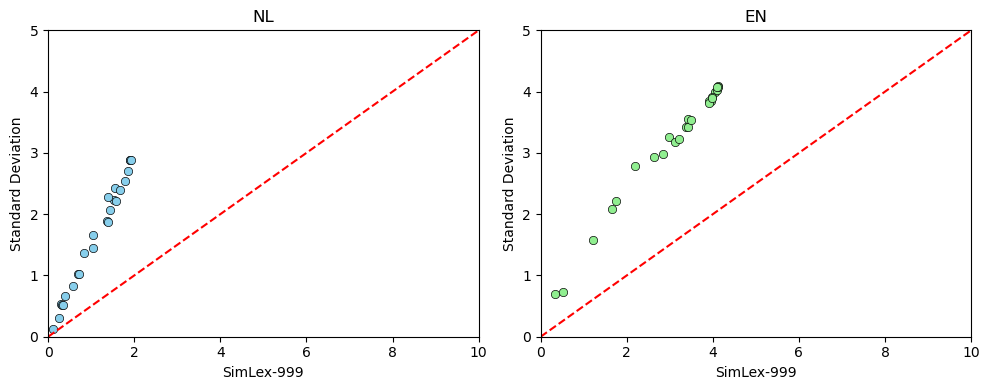

In [20]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='nl_pred_sl', y='nl_pred_sd', data=nl_pred, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('NL')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='en_pred_sl', y='en_pred_sd', data=en_pred, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('EN')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [21]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(conc, 'nl_pred_sl', 'nl_pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(conc, 'en_pred_sl', 'en_pred_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,nl_pred_sl,nl_pred_sd,0.98383,1.109369e-18,significant
1,en_pred_sl,en_pred_sd,0.99423,8.352191e-24,significant


### **6. Evaluation Metrics**

#### **6.1. Spearmans's Rank Correlation**

##### **6.1.1. NL SimLex-999 vs EN SimLex-999**

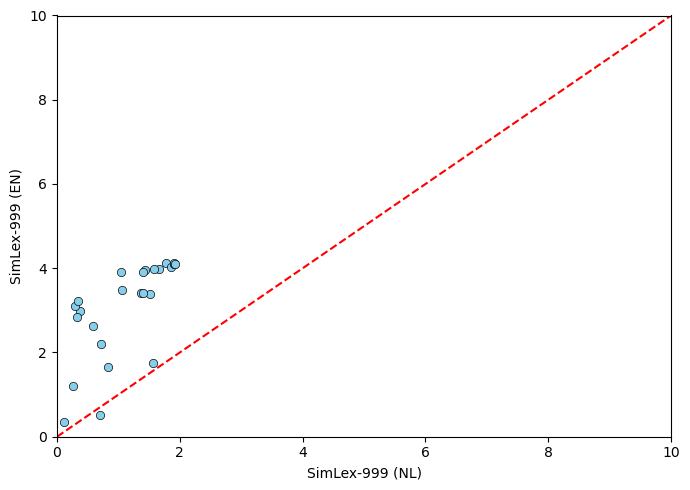

In [22]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [23]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.82413
P-value: 4.114796345877129e-07
The correlation is statistically significant.



##### **6.1.2. NL Standard Deviation vs EN Standard Deviation**

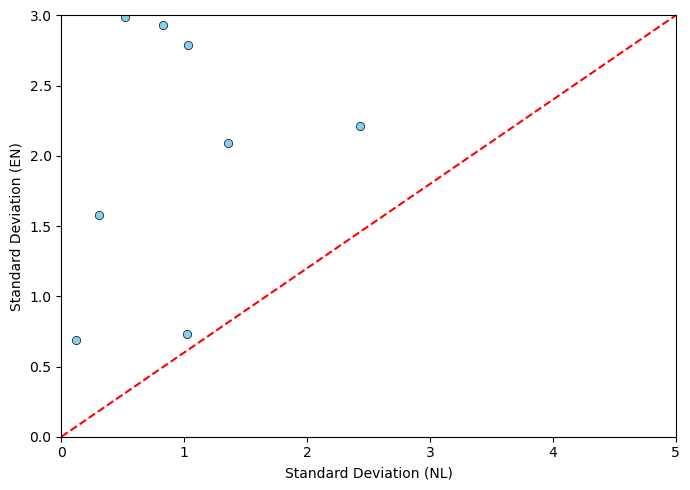

In [24]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sd', 'en_pred_sd', 'Standard Deviation (NL)', 'Standard Deviation (EN)', 0, 5, 0, 3)

In [25]:
# Correlation and p-value
print_correlation_and_pvalue(conc, 'nl_pred_sd', 'en_pred_sd')

Spearman's Rank correlation: 0.78899
P-value: 2.7785202872127244e-06
The correlation is statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [26]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 4.47


#### **7.3. Mean Absolute Error (MAE)**

In [27]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.95
